In [1]:
import numpy as np
import uproot
import glob
import os, sys, re
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
sys.path.append("/t3home/gcelotto/BTV/scripts/plotScripts")
from doPlots import map_to_groups, map_to_groups_prompt, getClassToLabel
eps = 0.000001


class_to_label = getClassToLabel()
map_to_groups_vec = np.vectorize(map_to_groups)



In [2]:

nFiles = 100
rootDir = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/"
fileNames = glob.glob(rootDir+"/*.root")
if len(fileNames)<nFiles:
    nFiles = len(fileNames)
else:
    fileNames=fileNames[:nFiles]
print("Taking %d files"%len(fileNames))
for fileIdx, fileName in enumerate(fileNames):
    print("Opening %s"%fileName)
    
    f = uproot.open(fileName)
    try:
        tree=f['tree']
    except:
        print("Skipping file. Broken")
        os.remove(fileName)
        continue
    print("File %d"%fileIdx)
    if fileIdx == 0:
        
        distance = np.array(tree['distance'])
        pdgID   =   np.array(tree['pdgID']).astype(int)
        eta   =   np.array(tree['eta'])
        pt   =   np.array(tree['pt'])
        displacement   =   np.array(tree['displacement'])
        nGenTracks   =   np.array(tree['nGenTracks'])
        promptStatus     = np.array(tree['promptStatus'])
        nSV     = np.array(tree['nSV'])

    else:
        
        distance        = np.concatenate((distance, np.array(tree['distance'])))
        pdgID           = np.concatenate((pdgID, np.array(tree['pdgID']).astype(int)))
        eta             = np.concatenate((eta, np.array(tree['eta'])))
        pt              = np.concatenate((pt, np.array(tree['pt'])))
        displacement    = np.concatenate((displacement, tree['displacement']))
        nGenTracks      = np.concatenate((nGenTracks, tree['nGenTracks']))
        promptStatus     = np.concatenate((promptStatus, tree['promptStatus']))
        nSV     = np.concatenate((nSV, tree['nSV']))

        
    #matched = np.array(tree['matched'])


#print(distance[distance>0])
mesons = map_to_groups_vec(pdgID)
commonMask = displacement>0.


Taking 100 files
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_435.root
File 0
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_436.root
File 1
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_349.root
File 2
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_399.root
File 3
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_392.root
File 4
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_769.root
File 5
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0p8/TTToH_350.root
File 6
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/btv_ntuples/TTToHadronic2024Jul23Tuple/tight/pt0

In [3]:

import pandas as pd
df = pd.DataFrame({
    'distance':distance,
    'pdgClass':pdgID,
    'pt':pt,
    'promptStatus':promptStatus,
    'displacement':displacement,
    'nSV':nSV,
    'nGenTracks':nGenTracks,
    'eta':eta
})
df['mesonsPrompt'] = df.apply(lambda row: int(map_to_groups_prompt(row['pdgClass'], row['promptStatus'])), axis=1)

In [4]:
print(np.sum(abs(df[(df.mesonsPrompt == 103)].pdgClass)==431)/len(df[(df.mesonsPrompt == 103)]))
print(np.sum(abs(df.pdgClass)==431)/len(df))

0.1547144754316069
0.055141712090766785


In D from B-3 the fraction of $D_s$ over total D is higher than in the whole dataset.\
If $D_s$ has an higher efficiency than $D$ this might explain the observed difference

In [5]:
print("Efficiency for D_s ", np.sum(df[abs(df.pdgClass)==431].distance>0)/len(df[abs(df.pdgClass)==431]))
print("Efficiency for D0 and D+ ", np.sum(df[(abs(df.pdgClass)==421) | (abs(df.pdgClass)==411)].distance>0)/len(df[(abs(df.pdgClass)==421) | (abs(df.pdgClass)==411)]))

Efficiency for D_s  0.2739077914233944
Efficiency for D0 and D+  0.4918576752258921


Efficiency is lower. Then since the largerst $c\tau$ is the oneof $D^\pm$ maybe those have greater efficiency and there are more in the D from B-3

In [6]:
print(np.sum(abs(df[(df.mesonsPrompt == 103)].pdgClass)==411)/len(df[(df.mesonsPrompt == 103)]))
print(np.sum(abs(df.pdgClass)==411)/len(df))

0.07636122177954847
0.09126081019572144


75 % of the D mesons in the B-3 category are $D^\pm$. If we show those have an higher efficiency, we might be done

In [7]:
print("Efficiency for D+ ", np.sum(df[abs(df.pdgClass)==411].distance>0)/len(df[abs(df.pdgClass)==411]))
print("Efficiency for D0 ", np.sum(df[(abs(df.pdgClass)==421)].distance>0)/len(df[(abs(df.pdgClass)==421)]))
print("Efficiency for Ds ", np.sum(df[(abs(df.pdgClass)==431)].distance>0)/len(df[(abs(df.pdgClass)==431)]))

print("Compositions of the B-3 sample vs B-1 sample:")
print("D from B-3")
m = (df.mesonsPrompt == 103)
print("D+ in D from B-3 ", len(df[(m) & (abs(df.pdgClass)==411)])/len(df[m]))
print("D0 in D from B-3 ", len(df[(m) & (abs(df.pdgClass)==421)])/len(df[m]))
print("Ds in D from B-3 ", len(df[(m) & (abs(df.pdgClass)==431)])/len(df[m]))

print("D from B-2")
m = (df.mesonsPrompt == 102)
print("D+ in D from B-2 ", len(df[(m) & (abs(df.pdgClass)==411)])/len(df[m]))
print("D0 in D from B-2 ", len(df[(m) & (abs(df.pdgClass)==421)])/len(df[m]))
print("Ds in D from B-2 ", len(df[(m) & (abs(df.pdgClass)==431)])/len(df[m]))

print("D from B-1")
m = (df.mesonsPrompt == 101)
print("D+ in D from B-1 ", len(df[(m) & (abs(df.pdgClass)==411)])/len(df[m]))
print("D0 in D from B-1 ", len(df[(m) & (abs(df.pdgClass)==421)])/len(df[m]))
print("Ds in D from B-1 ", len(df[(m) & (abs(df.pdgClass)==431)])/len(df[m]))


Efficiency for D+  0.48014111063803905
Efficiency for D0  0.4949689089881289
Efficiency for Ds  0.2739077914233944
Compositions of the B-3 sample vs B-1 sample:
D from B-3
D+ in D from B-3  0.07636122177954847
D0 in D from B-3  0.7689243027888446
Ds in D from B-3  0.1547144754316069
D from B-2
D+ in D from B-2  0.09733191035218783
D0 in D from B-2  0.776490318646135
Ds in D from B-2  0.1261777710016771
D from B-1
D+ in D from B-1  0.3076100993008861
D0 in D from B-1  0.5512757714743732
Ds in D from B-1  0.14111412922474062


In [8]:
m3 = ((abs(df.pdgClass)==411) | (abs(df.pdgClass)==421) | (abs(df.pdgClass)==431) ) & (df.mesonsPrompt==103) 
m2 = ((abs(df.pdgClass)==411) | (abs(df.pdgClass)==421) | (abs(df.pdgClass)==431) ) & (df.mesonsPrompt==102) 
m1 = ((abs(df.pdgClass)==411) | (abs(df.pdgClass)==421) | (abs(df.pdgClass)==431) ) & (df.mesonsPrompt==101) 
m0 = ((abs(df.pdgClass)==411) | (abs(df.pdgClass)==421) | (abs(df.pdgClass)==431) ) & (df.mesonsPrompt==100) 
print("Efficiency for D from B-3", np.sum(df[m3].distance>0)/len(df[m3]))
print("Efficiency for D from B-2", np.sum(df[m2].distance>0)/len(df[m2]))
print("Efficiency for D from B-1", np.sum(df[m1].distance>0)/len(df[m1]))
print("Efficiency for D prompt", np.sum(df[m0].distance>0)/len(df[m0]))

Efficiency for D from B-3 0.6354581673306773
Efficiency for D from B-2 0.4927885348376277
Efficiency for D from B-1 0.44467203989847265
Efficiency for D prompt 0.43637738022389405


In [9]:
# Efficiency for D+ only
m3 = ((abs(df.pdgClass)==411) ) & (df.mesonsPrompt==103) 
m2 = ((abs(df.pdgClass)==411) ) & (df.mesonsPrompt==102) 
m1 = ((abs(df.pdgClass)==411) ) & (df.mesonsPrompt==101) 
m0 = ((abs(df.pdgClass)==411) ) & (df.mesonsPrompt==100) 
print("Efficiency for D+ from B-3", np.sum(df[m3].distance>0)/len(df[m3]))
print("Efficiency for D+ from B-2", np.sum(df[m2].distance>0)/len(df[m2]))
print("Efficiency for D+ from B-1", np.sum(df[m1].distance>0)/len(df[m1]))
print("Efficiency for D+ prompt", np.sum(df[m0].distance>0)/len(df[m0]), "\n")

# Efficiency for D0 only
m3 = ((abs(df.pdgClass)==421) ) & (df.mesonsPrompt==103) 
m2 = ((abs(df.pdgClass)==421) ) & (df.mesonsPrompt==102) 
m1 = ((abs(df.pdgClass)==421) ) & (df.mesonsPrompt==101) 
m0 = ((abs(df.pdgClass)==421) ) & (df.mesonsPrompt==100) 
print("Efficiency for D0 from B-3", np.sum(df[m3].distance>0)/len(df[m3]))
print("Efficiency for D0 from B-2", np.sum(df[m2].distance>0)/len(df[m2]))
print("Efficiency for D0 from B-1", np.sum(df[m1].distance>0)/len(df[m1]))
print("Efficiency for D0 prompt", np.sum(df[m0].distance>0)/len(df[m0]), "\n")

# Efficiency for Ds only
m3 = ((abs(df.pdgClass)==431) ) & (df.mesonsPrompt==103) 
m2 = ((abs(df.pdgClass)==431) ) & (df.mesonsPrompt==102) 
m1 = ((abs(df.pdgClass)==431) ) & (df.mesonsPrompt==101) 
m0 = ((abs(df.pdgClass)==431) ) & (df.mesonsPrompt==100) 
print("Efficiency for Ds from B-3", np.sum(df[m3].distance>0)/len(df[m3]))
print("Efficiency for Ds from B-2", np.sum(df[m2].distance>0)/len(df[m2]))
print("Efficiency for Ds from B-1", np.sum(df[m1].distance>0)/len(df[m1]))
print("Efficiency for Ds prompt", np.sum(df[m0].distance>0)/len(df[m0]))

Efficiency for D+ from B-3 0.6130434782608696
Efficiency for D+ from B-2 0.47650375939849626
Efficiency for D+ from B-1 0.44687319050376373
Efficiency for D+ prompt 0.5146823278163374 

Efficiency for D0 from B-3 0.7262521588946459
Efficiency for D0 from B-2 0.5339092872570195
Efficiency for D0 from B-1 0.4850565428109855
Efficiency for D0 prompt 0.42648442529589464 

Efficiency for Ds from B-3 0.19527896995708155
Efficiency for Ds from B-2 0.25229579507008215
Efficiency for Ds from B-1 0.28210792047964656
Efficiency for Ds prompt 0.3143727780599289


Text(1, 0, 'Hadron pT')

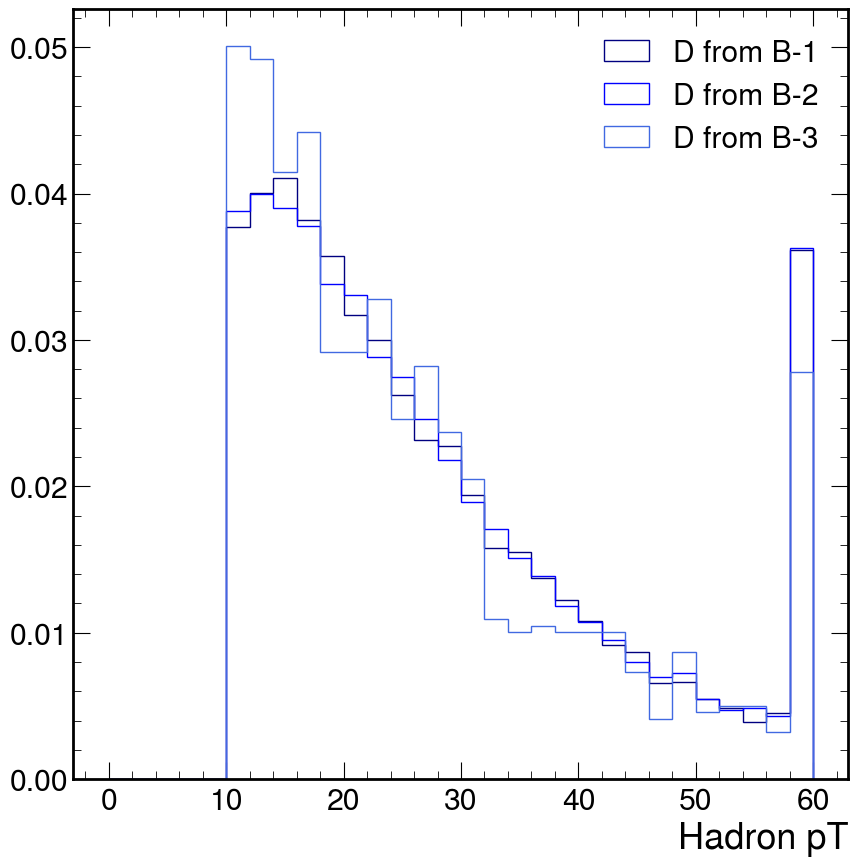

In [10]:

fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 60, 31)
#ax.hist(np.clip(df.pt[(df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D others', density=True, color='red')
#ax.hist(np.clip(df.pt[(df.pdgClass==411) & (df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D Prompt', density=True, color='orange')
ax.hist(np.clip(df.pt[(df.distance<0)  & (df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-1', density=True, color='navy')
ax.hist(np.clip(df.pt[(df.distance<0)  & (df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-2', density=True, color='blue')
ax.hist(np.clip(df.pt[(df.distance<0)  & (df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-3', density=True, color='royalblue')
ax.legend()
ax.set_xlabel("Hadron pT")


Text(1, 0, 'Distance [cm]')

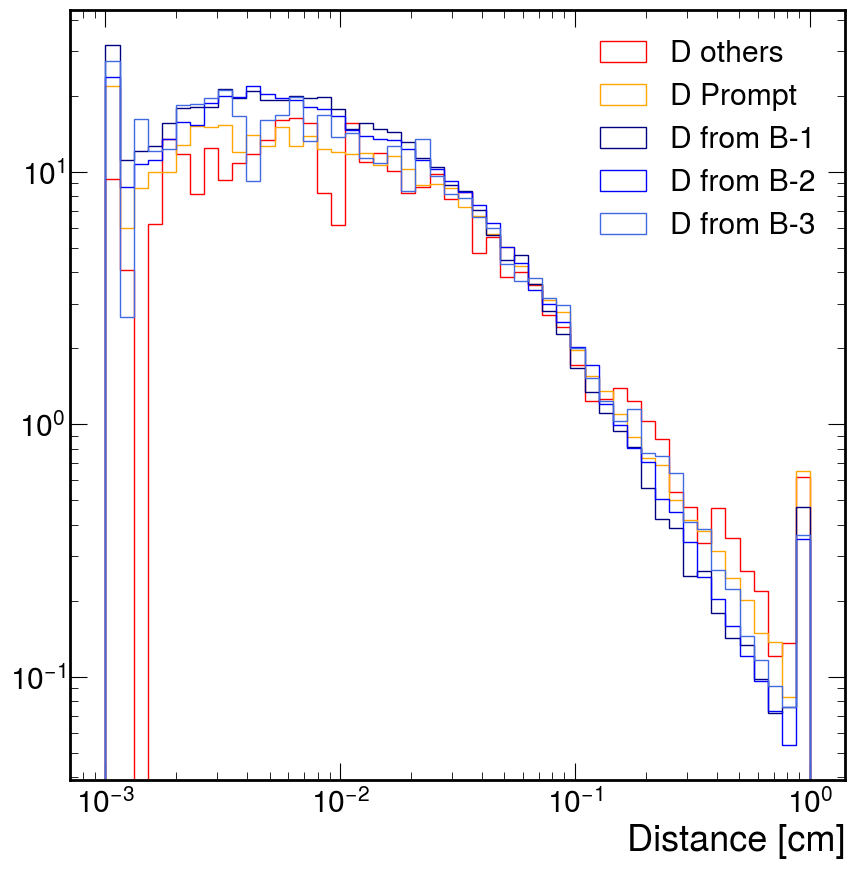

In [21]:

fig, ax = plt.subplots(1, 1)
bins=np.logspace(-3, 0, 51)
ax.hist(np.clip(df.distance[(df.distance>0) & (df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D others', density=True, color='red')
ax.hist(np.clip(df.distance[(df.distance>0) & (df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D Prompt', density=True, color='orange')
ax.hist(np.clip(df.distance[(df.distance>0) & (df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-1', density=True, color='navy')
ax.hist(np.clip(df.distance[(df.distance>0) & (df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-2', density=True, color='blue')
ax.hist(np.clip(df.distance[(df.distance>0) & (df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-3', density=True, color='royalblue')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Distance [cm]")


Text(1, 0, 'Hadron distance of flight')

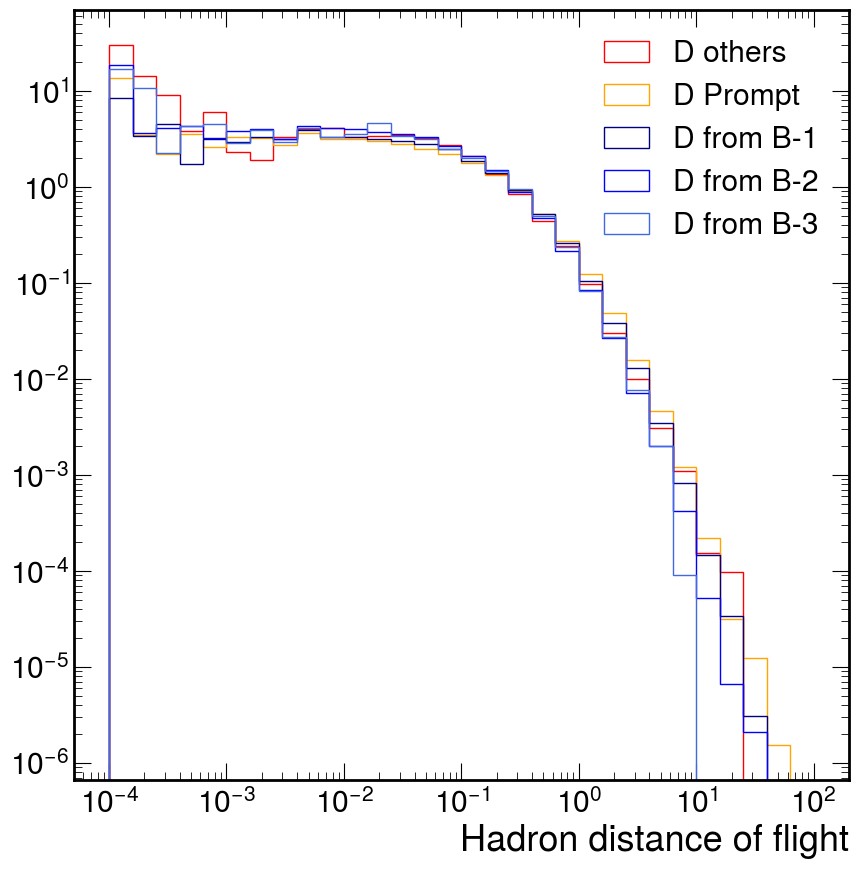

In [11]:

fig, ax = plt.subplots(1, 1)
bins=np.logspace(-4, 2, 31)
ax.hist(np.clip(df.displacement[(df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D others', density=True, color='red')
ax.hist(np.clip(df.displacement[(df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D Prompt', density=True, color='orange')
ax.hist(np.clip(df.displacement[(df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-1', density=True, color='navy')
ax.hist(np.clip(df.displacement[(df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-2', density=True, color='blue')
ax.hist(np.clip(df.displacement[(df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-3', density=True, color='royalblue')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Hadron distance of flight")


Text(1, 0, 'nSV')

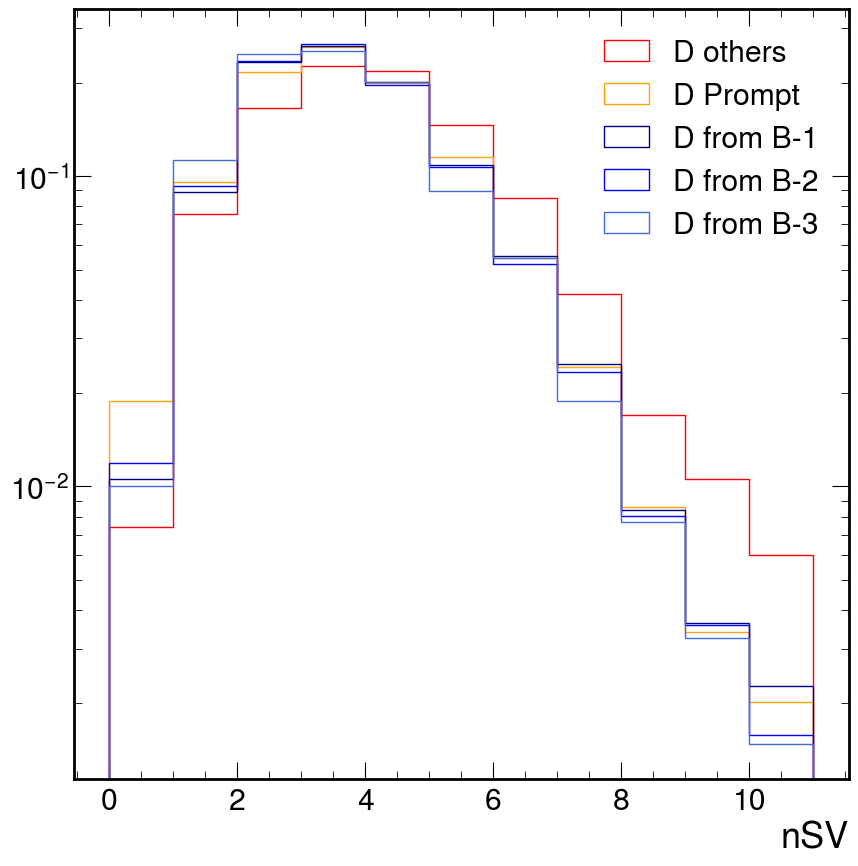

In [39]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 11, 12)
ax.hist(np.clip(df.nSV[(df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D others', density=True, color='red')
ax.hist(np.clip(df.nSV[(df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D Prompt', density=True, color='orange')
ax.hist(np.clip(df.nSV[(df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-1', density=True, color='navy')
ax.hist(np.clip(df.nSV[(df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-2', density=True, color='blue')
ax.hist(np.clip(df.nSV[(df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-3', density=True, color='royalblue')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel("nSV")


Text(1, 0, 'nGenTracks')

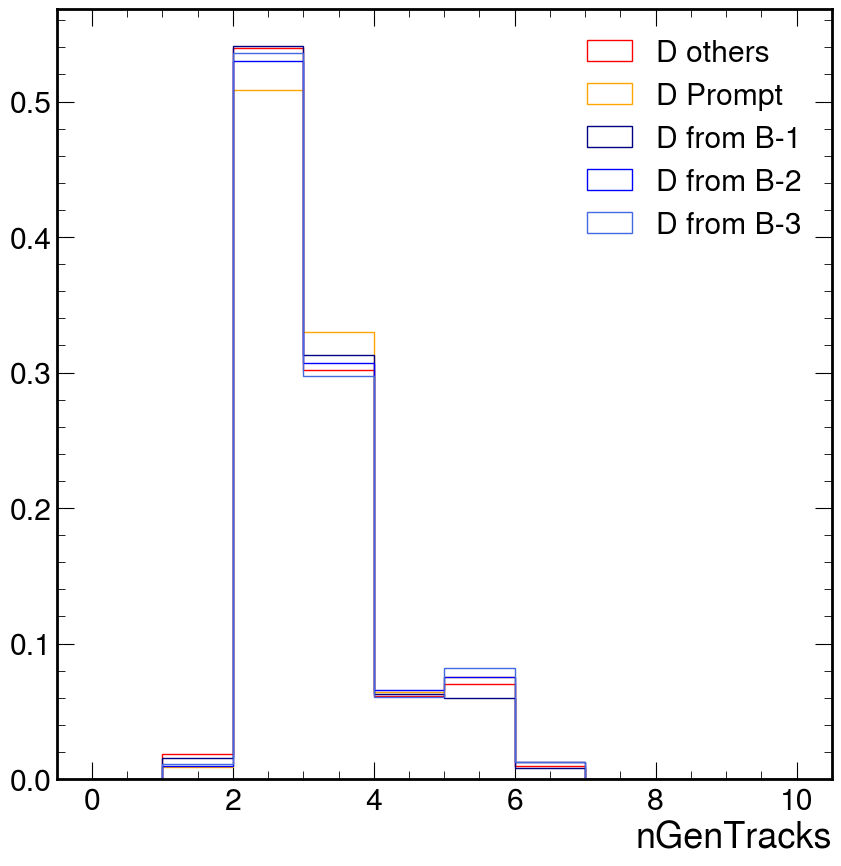

In [12]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 10, 11)
ax.hist(np.clip(df.nGenTracks[(df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D others', density=True, color='red')
ax.hist(np.clip(df.nGenTracks[(df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D Prompt', density=True, color='orange')
ax.hist(np.clip(df.nGenTracks[(df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-1', density=True, color='navy')
ax.hist(np.clip(df.nGenTracks[(df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-2', density=True, color='blue')
ax.hist(np.clip(df.nGenTracks[(df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='D from B-3', density=True, color='royalblue')
ax.legend()

ax.set_xlabel("nGenTracks")


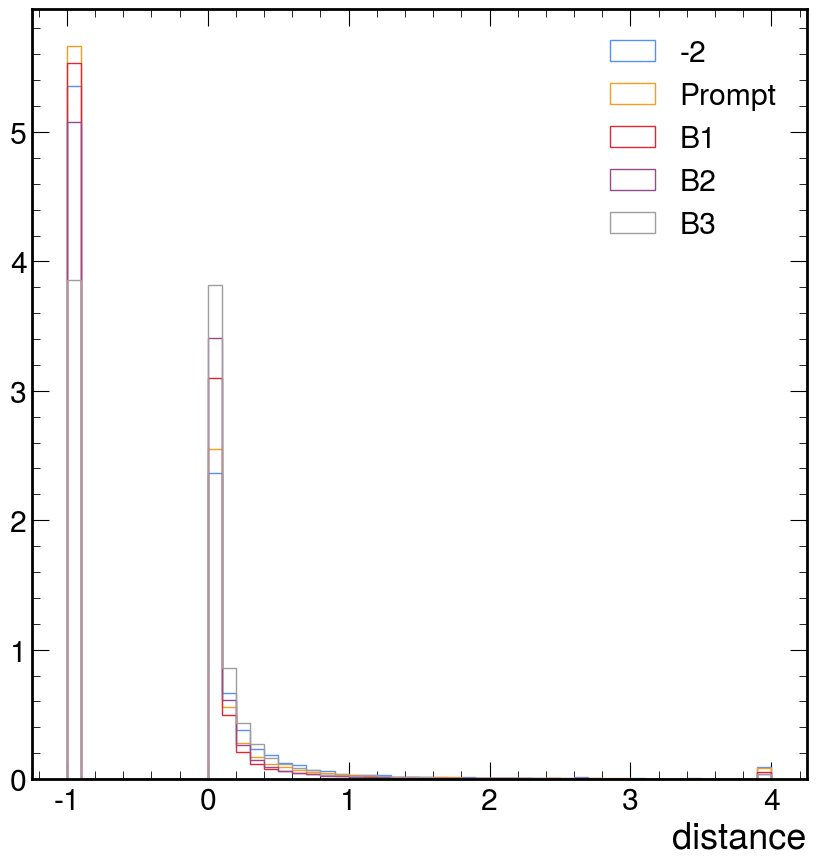

In [52]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(-1, 4, 51)
ax.hist(np.clip(df.distance[(df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='-2', density=True,)
ax.hist(np.clip(df.distance[(df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='Prompt', density=True,)
ax.hist(np.clip(df.distance[(df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='B1', density=True,)
ax.hist(np.clip(df.distance[(df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='B2', density=True,)
ax.hist(np.clip(df.distance[(df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='B3', density=True,)
ax.set_xlabel("distance")
ax.legend()

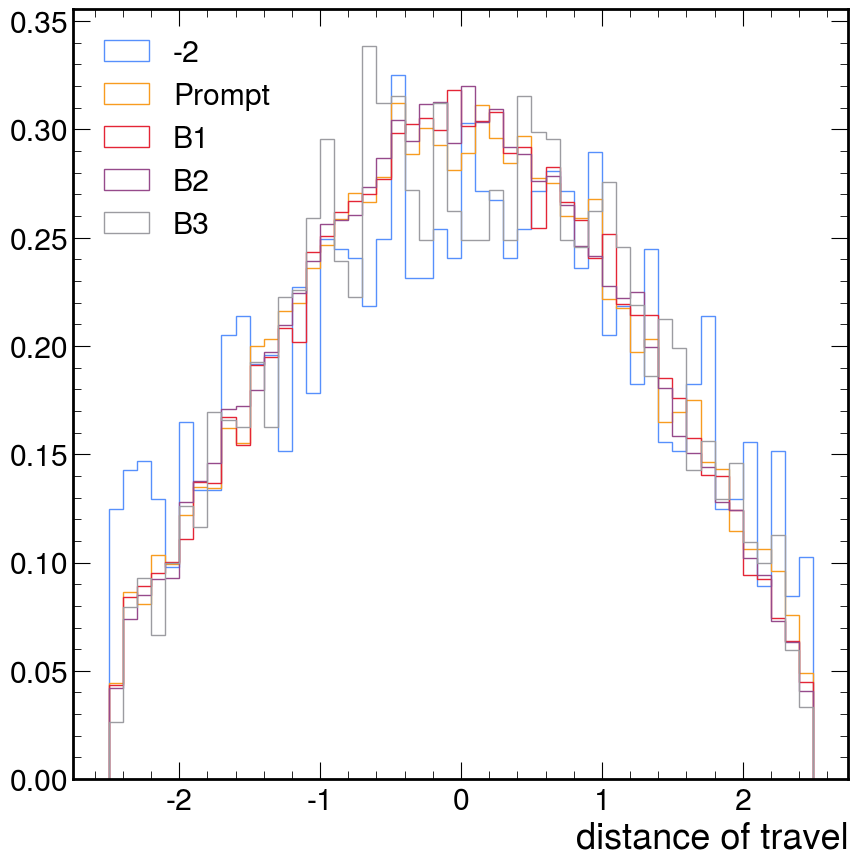

In [13]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(-2.5, 2.5, 51)
ax.hist(np.clip(df.eta[(df.mesonsPrompt==-200)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='-2', density=True,)
ax.hist(np.clip(df.eta[(df.mesonsPrompt==100)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='Prompt', density=True,)
ax.hist(np.clip(df.eta[(df.mesonsPrompt==101)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='B1', density=True,)
ax.hist(np.clip(df.eta[(df.mesonsPrompt==102)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='B2', density=True,)
ax.hist(np.clip(df.eta[(df.mesonsPrompt==103)], bins[0], bins[-1]),  bins=bins, histtype=u'step', label='B3', density=True,)
ax.set_xlabel("distance of travel")
ax.legend()